## Importação dos pacotes

In [23]:
# importar pacotes necessários
import numpy as np
import pandas as pd

In [24]:
# definir parâmetros extras
pd.set_option('precision', 4)
pd.set_option('display.max_columns', 100)

## Carga dos dados

In [25]:
# carregar arquivo de dados de treino
data = pd.read_csv('weather-train.csv', index_col='date', parse_dates=['date'])

# mostrar alguns exemplos de registros
data.head()

,temperature,humidity,wind_speed
date,,,
2012-10-01,11.0368,74.8000,0.0000
2012-10-02,14.3353,58.4444,0.6667
2012-10-03,14.5078,78.5556,1.8889
2012-10-04,16.8044,86.0000,1.3333
2012-10-05,16.9272,70.5556,3.6667


In [26]:
# quantas linhas e colunas existem?
data.shape

(1508, 3)

## Análise dos dados

In [27]:
# quais são as colunas e respectivos tipos de dados?
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1508 entries, 2012-10-01 to 2016-11-16
Data columns (total 3 columns):
temperature    1507 non-null float64
humidity       1507 non-null float64
wind_speed     1507 non-null float64
dtypes: float64(3)
memory usage: 47.1 KB


In [28]:
# existem colunas com dados nulos?
data[data.columns[data.isnull().any()]].isnull().sum()

temperature    1
humidity       1
wind_speed     1
dtype: int64

In [29]:
# sumário estatístico das características numéricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,1507.0,8.6882,10.8390,-25.1922,0.6578,9.4001,18.2459,28.2567
humidity,1507.0,77.2346,12.7587,33.6667,68.1111,78.1111,87.3333,100.0000
wind_speed,1507.0,3.0535,1.6119,0.0000,1.8889,2.7778,3.8889,9.8889


In [36]:
# qual o período de datas?
print(min(data.index.values), '=>', max(data.index.values))

2012-10-01T00:00:00.000000000 => 2016-11-16T00:00:00.000000000


In [37]:
10.0 / data.shape[0]

0.006631299734748011

In [11]:
periodo = '7D' # semanal
minimas = data.resample(periodo).min()
maximas = data.resample(periodo).max()
medias = data.resample(periodo).mean()
desvios = data.resample(periodo).std()

minimas.rename(columns={'temperature': 'minima'}, inplace=True)
maximas.rename(columns={'temperature': 'maxima'}, inplace=True)
medias.rename(columns={'temperature': 'media'}, inplace=True)
desvios.rename(columns={'temperature': 'desvio'}, inplace=True)

In [12]:
medias.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2012-10-01 to 2016-11-14
Data columns (total 3 columns):
media         216 non-null float64
humidity      216 non-null float64
wind_speed    216 non-null float64
dtypes: float64(3)
memory usage: 6.8 KB


In [13]:
temperaturas = minimas.merge(maximas, on='date').merge(medias, on='date').merge(desvios, on='date')

In [14]:
temperaturas['media-dp'] = temperaturas.media - temperaturas.desvio
temperaturas['media+dp'] = temperaturas.media + temperaturas.desvio

In [15]:
temperaturas.head(10).T

date,2012-10-01 00:00:00,2012-10-08 00:00:00,2012-10-15 00:00:00,2012-10-22 00:00:00,2012-10-29 00:00:00,2012-11-05 00:00:00,2012-11-12 00:00:00,2012-11-19 00:00:00,2012-11-26 00:00:00,2012-12-03 00:00:00
minima,6.2629,6.2322,7.1400,8.0463,3.4236,1.4981,-0.9413,0.7489,-1.6962,-0.1706
humidity_x,58.4444,41.6667,65.1111,64.0000,58.6000,55.6667,53.0000,54.5556,55.8000,55.5714
wind_speed_x,0.0000,0.1667,0.2000,0.3333,2.8571,0.3333,0.0000,0.2222,1.2500,0.2222
maxima,16.9272,7.7300,17.5729,17.7389,7.0100,9.4289,12.8944,9.7740,4.7671,13.0291
humidity_y,86.0000,81.0000,89.6667,85.5556,84.3333,81.8889,85.7778,93.8889,91.5000,93.2222
wind_speed_y,3.6667,4.2222,6.4444,4.2500,8.8889,3.2000,5.4444,5.8889,5.1111,4.3333
media,13.4582,7.0796,12.0281,12.7332,4.9512,3.9986,5.1388,5.5626,1.4365,6.2037
humidity_x,74.1256,64.1925,73.2662,76.3651,71.3488,68.4143,71.6222,81.5048,70.6732,78.9070
wind_speed_x,1.9501,2.3837,3.4889,2.2897,5.5334,2.0437,2.2571,2.2889,2.7826,2.1984
desvio,3.7306,0.5824,3.6222,4.2483,1.1830,2.6696,5.2879,2.9377,2.0945,5.0108


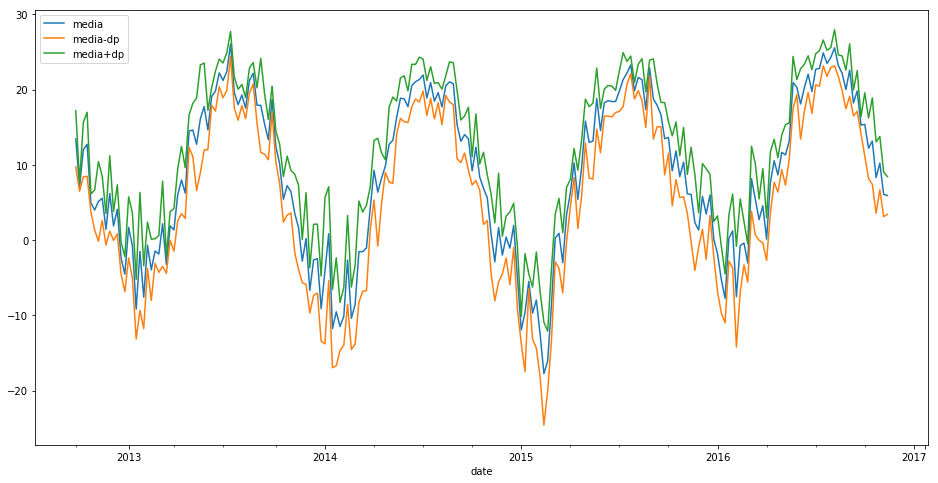

In [17]:
temperaturas[['media', 'media-dp', 'media+dp']].plot(figsize=(16,8))